In [2]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
import fitz
import os
import yfinance as yf
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.io as pio

In [3]:
# Initialize the sentiment analyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\brent\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [4]:
# Initialize empty lists to store sentiments and file names
sentiments = []
file_names = []

directory = "C:\\Users\\brent\\OneDrive\\Documents\\python_projects\\Fed-Meeting-Minutes-Causal-Analysis\\Statements"

In [5]:
def extract_text_from_pdf(pdf_path):
    text = ""
    doc = fitz.open(pdf_path)
        
    for page in doc:
        text += page.get_text()
    return text

# Iterate through PDFs in the directory
for filename in os.listdir(directory):
    if filename.endswith(".pdf"):
        file_path = os.path.join(directory, filename)
        
        # Extract text from the PDF
        pdf_text = extract_text_from_pdf(file_path)
        
        # Analyze sentiment
        sentiment = sia.polarity_scores(pdf_text)
        sentiments.append(sentiment['compound'])
        file_names.append(filename)

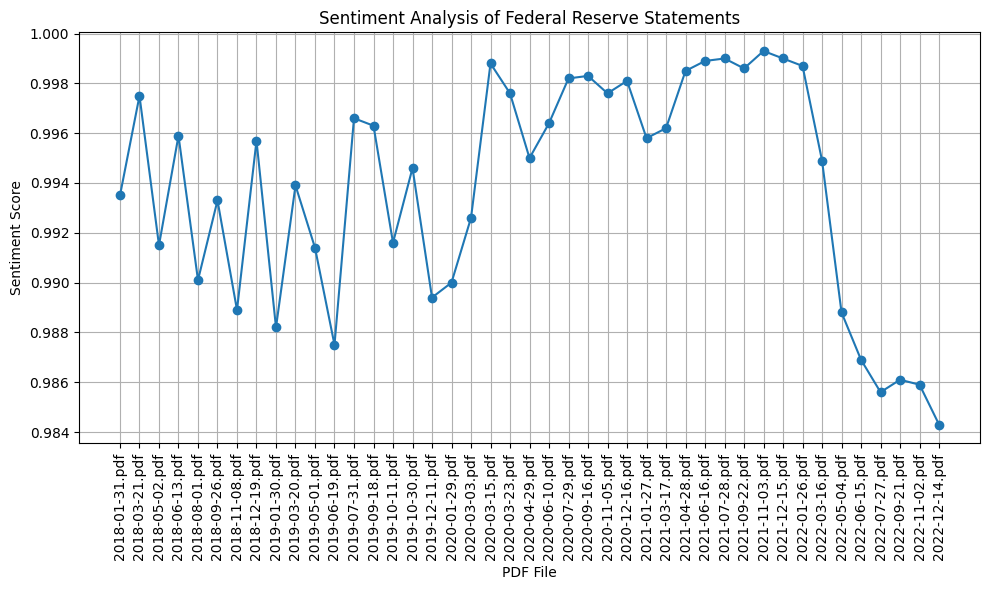

In [6]:
# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(file_names, sentiments, marker='o')
plt.title('Sentiment Analysis of Federal Reserve Statements')
plt.xlabel('PDF File')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=90)
plt.grid(True)

plt.tight_layout()
plt.show()

In [7]:
# Define the ticker symbol for the S&P 500
symbol = "^GSPC"

# Set the start and end dates for the historical data
start_date = "2018-01-01"
end_date = "2022-12-31"  # You can adjust the end date as needed

# Fetch historical data using yfinance
sp500_data = yf.download(symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


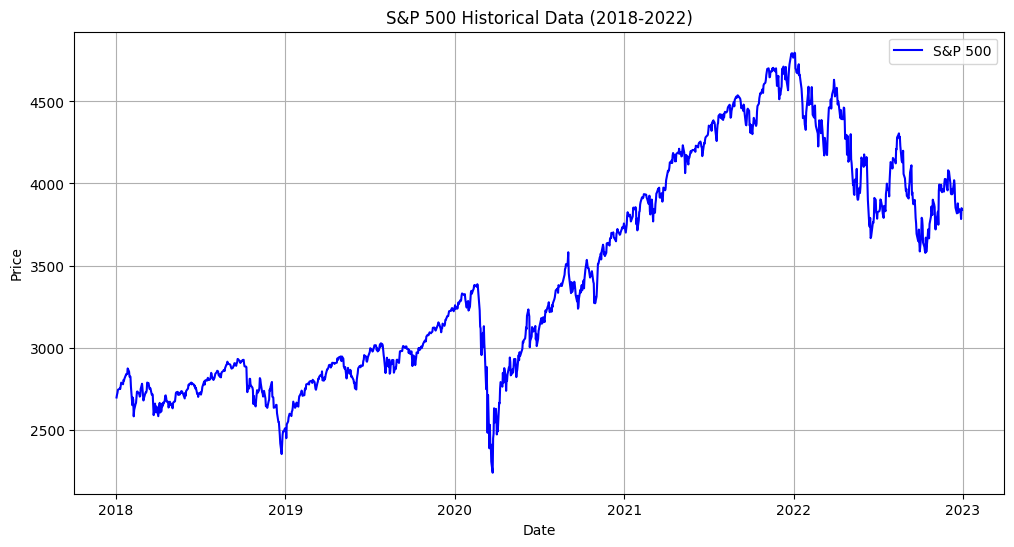

In [8]:
# Create a line chart
plt.figure(figsize=(12, 6))
plt.plot(sp500_data['Close'], label='S&P 500', color='blue')
plt.title('S&P 500 Historical Data (2018-2022)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

In [9]:
date_labels = [filename.replace('.pdf', '') for filename in file_names]

C:\Users\brent\AppData\Local\Temp\ipykernel_15392\819175940.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(date_labels, rotation=90)  # Set the x-axis labels to display dates


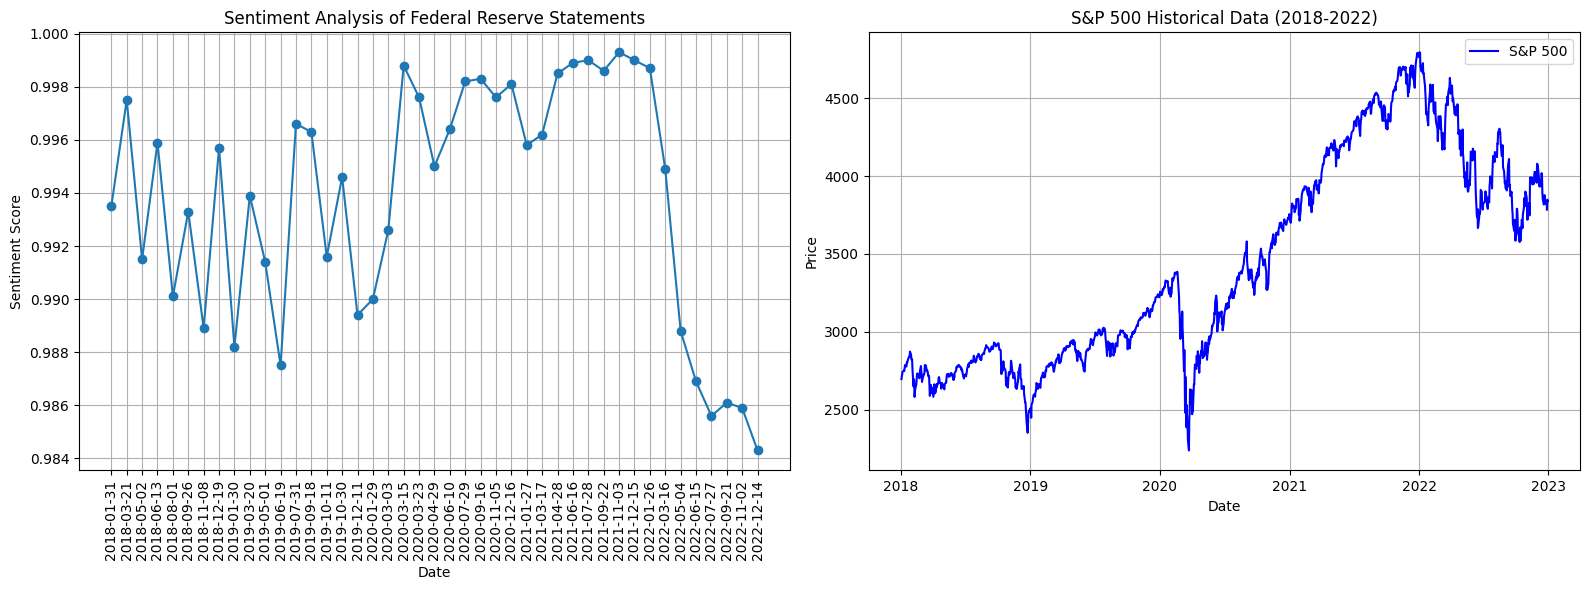

In [10]:
# Create subplots with two side-by-side charts
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot Sentiment Analysis on the left subplot
axes[0].plot(date_labels, sentiments, marker='o')
axes[0].set_title('Sentiment Analysis of Federal Reserve Statements')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Sentiment Score')
axes[0].set_xticklabels(date_labels, rotation=90)  # Set the x-axis labels to display dates
axes[0].grid(True)
# Plot S&P 500 Historical Data on the right subplot
axes[1].plot(sp500_data.index, sp500_data['Close'], label='S&P 500', color='blue')
axes[1].set_title('S&P 500 Historical Data (2018-2022)')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Price')
axes[1].legend()
axes[1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

In [11]:
# Create subplots with different y-axes scales
fig = make_subplots(rows=1, cols=2, subplot_titles=("Sentiment Analysis", "S&P 500"))
fig.update_xaxes(title_text="Date")

# Add Sentiment Analysis line chart to the left subplot
fig.add_trace(go.Scatter(x=date_labels, y=sentiments, name="Sentiment", mode="lines"), row=1, col=1)
fig.update_yaxes(title_text="Sentiment Score", row=1, col=1)

# Add S&P 500 line chart to the right subplot
fig.add_trace(go.Scatter(x=sp500_data.index, y=sp500_data['Close'], name="S&P 500", mode="lines", line=dict(color='blue')), row=1, col=2)
fig.update_yaxes(title_text="Price", row=1, col=2)

# Customize the layout
fig.update_layout(title_text="Sentiment Analysis and S&P 500 Historical Data (2018-2022)")

# Show the combined chart
fig.show()

In [12]:
# Define the ticker symbol for the S&P 500
symbol = "^IXIC"
# Fetch historical data using yfinance
nasdaq_data = yf.download(symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


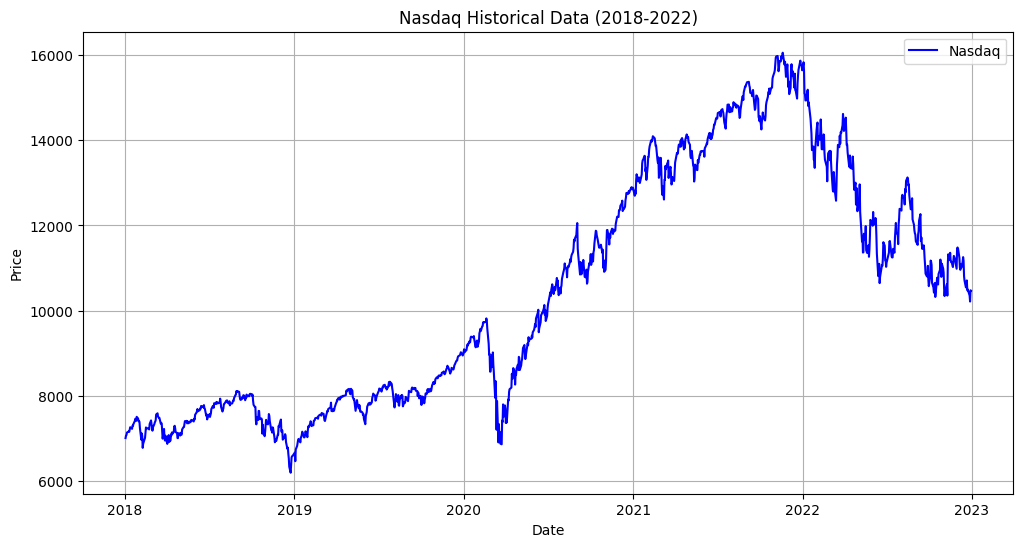

In [13]:
# Create a line chart
plt.figure(figsize=(12, 6))
plt.plot(nasdaq_data['Close'], label='Nasdaq', color='blue')
plt.title('Nasdaq Historical Data (2018-2022)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

C:\Users\brent\AppData\Local\Temp\ipykernel_15392\3898004160.py:9: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



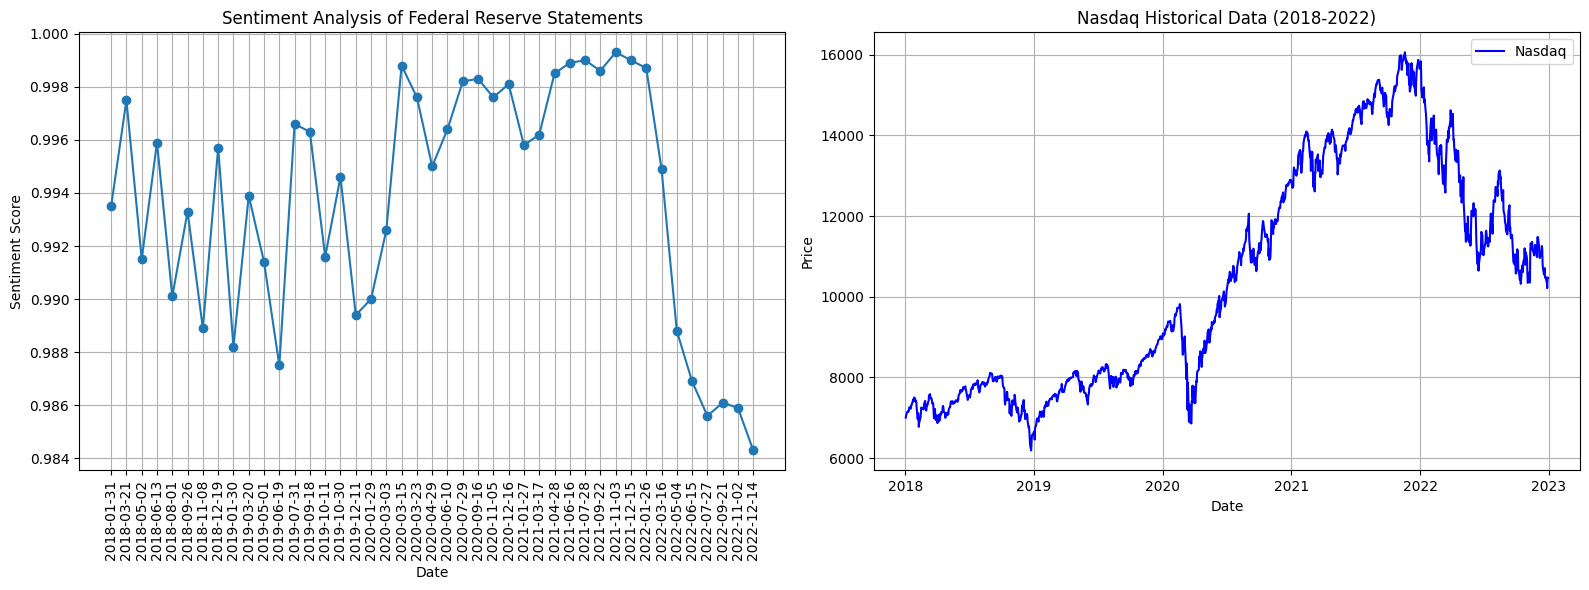

In [15]:
# Create subplots with two side-by-side charts
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot Sentiment Analysis on the left subplot
axes[0].plot(date_labels, sentiments, marker='o')
axes[0].set_title('Sentiment Analysis of Federal Reserve Statements')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Sentiment Score')
axes[0].set_xticklabels(date_labels, rotation=90)  # Set the x-axis labels to display dates
axes[0].grid(True)
# Plot S&P 500 Historical Data on the right subplot
axes[1].plot(nasdaq_data.index, nasdaq_data['Close'], label='Nasdaq', color='blue')
axes[1].set_title('Nasdaq Historical Data (2018-2022)')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Price')
axes[1].legend()
axes[1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

In [16]:
# Create subplots with different y-axes scales
fig = make_subplots(rows=1, cols=2, subplot_titles=("Sentiment Analysis", "Nasdaq"))
fig.update_xaxes(title_text="Date")

# Add Sentiment Analysis line chart to the left subplot
fig.add_trace(go.Scatter(x=date_labels, y=sentiments, name="Sentiment", mode="lines"), row=1, col=1)
fig.update_yaxes(title_text="Sentiment Score", row=1, col=1)

# Add S&P 500 line chart to the right subplot
fig.add_trace(go.Scatter(x=nasdaq_data.index, y=nasdaq_data['Close'], name="Nasdaq", mode="lines", line=dict(color='blue')), row=1, col=2)
fig.update_yaxes(title_text="Price", row=1, col=2)

# Customize the layout
fig.update_layout(title_text="Sentiment Analysis and Nasdaq Historical Data (2018-2022)")

# Show the combined chart
fig.show()